In [1]:
%matplotlib inline

# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from pprint import pprint
from scipy.stats import sem, ttest_ind
import gmaps

# Census API Key
import sys
sys.path.append('../../../..')
from config import census_api_key
c = Census(census_api_key, year=2016)

In [2]:
census_data = c.acs5.get(("NAME", "B01003_001E", "B01001_002E", "B01001_026E", "B02001_002E", "B02001_003E","B02001_004E", "B02001_005E",
                          "B02001_006E", "B02001_007E", "B02001_008E", "B03002_012E", "B08013_001E", "B08012_001E", "B15003_001E",
                          "B15003_002E", "B15003_003E", "B15003_004E", "B15003_005E", "B15003_006E", "B15003_007E", "B15003_008E",
                          "B15003_009E", "B15003_010E", "B15003_011E", "B15003_012E", "B15003_013E", "B15003_014E", "B15003_015E",
                          "B15003_016E", "B15003_017E", "B15003_018E", "B15003_019E", "B15003_020E", "B15003_021E", "B15003_022E",
                          "B15003_023E", "B15003_024E", "B15003_025E", "B17001_001E", "B17001_002E", "B18135_001E", "B18135_003E", 
                          "B18135_014E", "B18135_025E", "B19001_001E", "B19013_001E", "B19055_002E", "B19056_002E", "B19057_002E",
                          "B19001_002E", "B19001_003E", "B19001_004E", "B19001_005E", "B19001_006E", "B19001_007E", "B19001_008E",
                          "B19001_009E", "B19001_010E", "B19001_011E", "B19001_012E", "B19001_013E", "B19001_014E", "B19001_015E",
                          "B19001_016E", "B19001_017E", "B23025_003E", "B23025_005E", "B25002_001E", "B25002_002E", "B25004_001E",
                          "B25043_007E", "B25043_016E", "B27010_017E", "B27010_033E", "B27010_050E", "B27010_066E"),
                         {'for': 'zip code tabulation area:*'})

census_pd = pd.DataFrame(census_data)

#Column Renaming
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01001_002E": "Male",
                                      "B01001_026E": "Female",
                                      "B02001_002E": "White",
                                      "B02001_003E": "Black",
                                      "B02001_004E": "Indian", 
                                      "B02001_005E": "Asian",
                                      "B02001_006E": "Hawaiian",
                                      "B02001_007E": "Other Race",
                                      "B02001_008E": "Multirace",
                                      "B03002_012E": "Hispanic Origin",
                                      "B08013_001E": "Length of Commute", 
                                      "B08012_001E": "Workers over 16", 
                                      "B15003_001E": "Age Over 25",
                                      "B15003_002E": "No schooling",
                                      "B15003_003E": "Nursery school",
                                      "B15003_004E": "Kindergarten",
                                      "B15003_005E": "1st grade",
                                      "B15003_006E": "2nd grade",
                                      "B15003_007E": "3rd grade",
                                      "B15003_008E": "4th grade",
                                      "B15003_009E": "5th grade",
                                      "B15003_010E": "6th grade",
                                      "B15003_011E": "7th grade",
                                      "B15003_012E": "8th grade",
                                      "B15003_013E": "9th grade",
                                      "B15003_014E": "10th grade",
                                      "B15003_015E": "11th grade",
                                      "B15003_016E": "12th grade no diploma",
                                      "B15003_017E": "High school diploma",
                                      "B15003_018E": "GED or alter",
                                      "B15003_019E": "College less than 1 year",
                                      "B15003_020E": "Some college 1 or more years",
                                      "B15003_021E": "Associate's degree",
                                      "B15003_022E": "Bachelor's degree",
                                      "B15003_023E": "Master's degree",
                                      "B15003_024E": "Professional school",
                                      "B15003_025E": "Doctorate degree",
                                      "B17001_001E": "Poverty Universe",
                                      "B17001_002E": "Poverty Count",
                                      "B18135_001E": "Non-Instiutionalized",
                                      "B18135_003E": "Disability 1",                           
                                      "B18135_014E": "Disability 2", 
                                      "B18135_025E": "Disability 3",
                                      "B19001_001E": "Households",
                                      "B19013_001E": "Per capita",
                                      "B19057_002E": "Cash Public Assistance",
                                      "B19001_002E": "Less than $10k",
                                      "B19001_003E": "$10k", 
                                      "B19001_004E": "$15k",
                                      "B19001_005E": "$20k",
                                      "B19001_006E": "$25k",
                                      "B19001_007E": "$30k",
                                      "B19001_008E": "$35k",
                                      "B19001_009E": "$40k",
                                      "B19001_010E": "$45k",
                                      "B19001_011E": "$50k",
                                      "B19001_012E": "$60k",
                                      "B19001_013E": "$75k",
                                      "B19001_014E": "$100k",
                                      "B19001_015E": "$125k",
                                      "B19001_016E": "$150k",
                                      "B19001_017E": "$200k or more",
                                      "B23025_003E": "Civilian Labor Force", 
                                      "B23025_005E": "Unemployed Civilian",
                                      "B25002_001E": "Housing Units", 
                                      "B25002_002E": "Occupied Housing",
                                      "B25004_001E": "Vacant Housing",
                                      "B25043_007E": "No phone 1", 
                                      "B25043_016E": "No phone 2",
                                      "B27010_017E": "No HI1",
                                      "B27010_033E": "No HI2",
                                      "B27010_050E": "No HI3",
                                      "B27010_066E": "No HI4",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

##################################################
# percentage of white people
census_pd["white rate"] = 100 * census_pd["White"]/census_pd["Population"]

# percentage of black people
census_pd["black rate"] = 100 * census_pd["Black"]/census_pd["Population"]

# percentage of indian people
census_pd["indian rate"] = 100 * census_pd["Indian"]/census_pd["Population"]

# percentage of asian people
census_pd["asian rate"] = 100 * census_pd["Asian"]/census_pd["Population"]

# percentage of hawaiian people
census_pd["hawaiian rate"] = 100 * census_pd["Hawaiian"]/census_pd["Population"]

# percentage of other race
census_pd["other race rate"] = 100 * census_pd["Other Race"]/census_pd["Population"]

# percentage of multirace
census_pd["multirace rate"] = 100 * census_pd["Multirace"]/census_pd["Population"]

# percentage of hispanic
census_pd["hispanic rate"] = 100 * census_pd["Hispanic Origin"]/census_pd["Population"]

########################################################
# percentage of age over 25 with no schooling
census_pd["No schooling rate"] = 100 * census_pd["No schooling"]/census_pd["Age Over 25"]

# percentage of nursey school to 8th grade
census_pd["Nurse to 8th"] = census_pd["Kindergarten"] + census_pd["1st grade"] + census_pd["2nd grade"]\
    + census_pd["3rd grade"] + census_pd["4th grade"] + census_pd["5th grade"] + census_pd["6th grade"]\
    + census_pd["7th grade"] + census_pd["8th grade"]
census_pd["Nurse to 8th Grade Rate"] = 100 * census_pd["Nurse to 8th"]/census_pd["Age Over 25"]

# percentage of some high school
census_pd["some high school"] = census_pd["9th grade"] + census_pd["10th grade"] + census_pd["11th grade"]\
    + census_pd["12th grade no diploma"]
census_pd["some high school rate"] = 100 * census_pd["some high school"]/census_pd["Age Over 25"]

# percentage of high school graduates or equilvalent
census_pd["high school grad"] = census_pd["High school diploma"] + census_pd["GED or alter"] 
census_pd["high school grad rate"] = 100 * census_pd["high school grad"]/census_pd["Age Over 25"]

# percentage of some college
census_pd["some college"] = census_pd["College less than 1 year"] + census_pd["Some college 1 or more years"] 
census_pd["some college rate"] = 100 * census_pd["some college"]/census_pd["Age Over 25"]

# percentage of associate degree
census_pd["Associate's degree rate"] = 100 * census_pd["Associate's degree"]/census_pd["Age Over 25"]

# percentage of bachelor degree
census_pd["Bachelor's degree rate"] = 100 * census_pd["Bachelor's degree"]/census_pd["Age Over 25"]

# percentage of graduate degree
census_pd["graduate degree"] = census_pd["Master's degree"] + census_pd["Professional school"] + census_pd["Doctorate degree"]
census_pd["graduate degree rate"] = 100 * census_pd["graduate degree"]/census_pd["Age Over 25"]

# high school grad or higher
census_pd["high school grad and up"] = census_pd["high school grad"] + census_pd["some college"]\
    + census_pd["Associate\'s degree"] + census_pd["Bachelor\'s degree"] + census_pd["graduate degree"]
census_pd["high school grad and up rate"] = 100 * census_pd["high school grad and up"]/census_pd["Age Over 25"]

# bachelor degree or higher
census_pd["bachelor or higher"] = census_pd["Bachelor\'s degree"] + census_pd["graduate degree"]
census_pd["bachelor or higher rate"] = 100 * census_pd["bachelor or higher"]/census_pd["Age Over 25"]

######################################################
# Add in Poverty Rate (Poverty Count / Poverty Universe) 
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
         int) / census_pd["Poverty Universe"].astype(int)

#####################################################
# percentage of less than 10k
census_pd["Less than 10k rate"] = 100 * census_pd["Less than $10k"]/census_pd["Households"]

# percentage of 10k-25k
census_pd["10k to 25k"] = census_pd["$10k"] + census_pd["$15k"] + census_pd["$20k"]
census_pd["10k to 25k rate"] = 100 * census_pd["10k to 25k"]/census_pd["Households"]

# percentage of 25k-50k
census_pd["25k to 50k"] = census_pd["$25k"] + census_pd["$30k"] + census_pd["$35k"] + census_pd["$40k"] + census_pd["$45k"]
census_pd["25k to 50k rate"] = 100 * census_pd["25k to 50k"]/census_pd["Households"]

# percentage of 50k-75k
census_pd["50k to 75k"] = census_pd["$50k"] + census_pd["$60k"]  
census_pd["50k to 75k rate"] = 100 * census_pd["50k to 75k"]/census_pd["Households"]

# percentage of 75k-100k
census_pd["75k to 100k rate"] = 100 * census_pd["$75k"]/census_pd["Households"]

# percentage of 100k-150k
census_pd["100k to 150k"] = census_pd["$100k"] + census_pd["$125k"]  
census_pd["100k to 150k rate"] = 100 * census_pd["100k to 150k"]/census_pd["Households"]

# percentage of 75k-100k
census_pd["150k to 200k rate"] = 100 * census_pd["$150k"]/census_pd["Households"]

# percentage of over 200k
census_pd["over 200k rate"] = 100 * census_pd["$200k or more"]/census_pd["Households"]

######################################################
# Average Commuting (Length of Commute / Workers Over 16) 
census_pd["Average Commute"] = census_pd["Length of Commute"]/census_pd["Workers over 16"]

##########################################################
# Percentage of disabled population 
census_pd["Disability"] = census_pd["Disability 1"] + census_pd["Disability 2"] + census_pd["Disability 3"]
census_pd["Disability Rate"] = 100 * census_pd["Disability"] / census_pd["Non-Instiutionalized"]

########################################################
# Add in Unemployment Rate
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployed Civilian"].astype(
        int) / census_pd["Civilian Labor Force"].astype(int)

#########################################################
# Add in Vacancy Rate
census_pd["Vacancy Rate"] = 100 * \
    census_pd["Vacant Housing"].astype(
        int) / census_pd["Housing Units"].astype(int)

###########################################################
# Add Health Insurance Rate
census_pd["No Health Insurance"] = census_pd["No HI1"] + census_pd["No HI2"] + census_pd["No HI3"] + census_pd["No HI4"]
census_pd["No Health Insurance Rate"] = 100 * census_pd["No Health Insurance"] / census_pd["Non-Instiutionalized"]

############################################################
# public assistance rate
census_pd["Cash Public Assistance Rate"] = 100 * (census_pd["Cash Public Assistance"]) / census_pd["Households"]


In [100]:
# check number of columns 124
len(census_pd.columns)


124

In [101]:
# open csv of zipcode with lat and long in string
latlng_df = pd.read_csv("zip code with lat and long.csv", dtype='str')

# open csv of rural percentage with zipcode in string
rural_df = pd.read_csv("RuralPercent.csv", dtype='str')


In [102]:
# merge census pd and latlng df by Zipcode
census_pd = pd.merge(census_pd, latlng_df, on="Zipcode")

# check length 126
len(census_pd.columns)

126

In [103]:
# merge census pd (already with latlng) with rural percentage by zipcode
census_pd = pd.merge(census_pd, rural_df, on="Zipcode")

# check length 128
len(census_pd.columns)

128

In [104]:
# set conditions for new column of Urban and Rural based off the percentage of rural percent (used later for t tests)
conditions = [census_pd["Rural Percent"].astype(float) <= 50,
              census_pd["Rural Percent"].astype(float) > 50]

# set outputs for new column
outputs = ["Urban", "Rural"]

# create series based off of conditions and outputs
res = np.select(conditions, outputs, 'fill')

# add series to the dataframe
census_pd["label"] = pd.Series(res)

#check to see rural and urban value count 
census_pd["label"].value_counts()

Rural    19556
Urban    13563
Name: label, dtype: int64

In [105]:
# export the large dataframe based off census API to csv
census_pd.to_csv('censusall.csv')

In [106]:
# read in the large dataframe csv
census_pd = pd.read_csv('censusall.csv')

# remove from dataframe all rows that do not have any population in census data
census_pd = census_pd[census_pd["Population"] != 0]

32798

In [107]:
####BUILD THOSE DATAFRAMES####

# Race Dataframe
census_pd_race = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Population", "white rate",
                            "black rate", "indian rate", "asian rate", "hawaiian rate", "other race rate", "multirace rate",
                            "hispanic rate", "label"]]

# Education DataFrame
census_pd_educ = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Age Over 25", "No schooling rate",
                            "Nurse to 8th Grade Rate", "some high school rate", "high school grad rate", "some college rate",
                            "Associate's degree rate", "Bachelor's degree rate", "graduate degree rate",
                           "high school grad and up rate", "bachelor or higher rate", "label"]]

# remove from dataframe all rows that do not have anyone over age of 25 in census data
census_pd_educ = census_pd_educ[census_pd_educ["Age Over 25"] != 0]

# Income DataFrame (includes cash assistance)
census_pd_income = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Households", "Per capita", 
                              "Less than 10k rate", "10k to 25k rate", "25k to 50k rate", "50k to 75k rate", 
                              "75k to 100k rate", "100k to 150k rate", "150k to 200k rate", "over 200k rate",
                              "Cash Public Assistance Rate", "label"]]

# remove from dataframe all rows that do not have any households in census data
census_pd_income = census_pd_income[census_pd_income["Households"] != 0]

# Poverty DataFrame
census_pd_poverty = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Poverty Rate",
                               "Poverty Universe", "label"]]

# remove from dataframe all rows that do not have any poverty universe in census data
census_pd_poverty = census_pd_poverty[census_pd_poverty["Poverty Universe"] != 0]

# Commute DataFrame
census_pd_commute = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Average Commute",
                               "Workers over 16", "label"]]

# remove from dataframe all rows that do not have any workers over 16 in census data
census_pd_commute = census_pd_commute[census_pd_commute["Workers over 16"] != 0]

# Disability and Health Insurance DataFrame
census_pd_disable = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Disability Rate",
                               "No Health Insurance Rate", "Non-Instiutionalized", "label"]]

# remove from dataframe all rows that do not have any non-institutionalized in the census data
census_pd_disable = census_pd_disable[census_pd_disable["Non-Instiutionalized"] != 0]

# unemployment dataframe
census_pd_unemploy = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Unemployment Rate", 
                                "Civilian Labor Force", "label"]]

# remove from dataframe all rows that do not have any civilian labor force in the census data
census_pd_unemploy = census_pd_unemploy[census_pd_unemploy["Civilian Labor Force"] != 0]

# vacancy dataframe
census_pd_vacant = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Vacancy Rate",
                              "Housing Units", "label"]]

# remove from dataframe all rows that do not have any housing units in the census data
census_pd_vacant = census_pd_vacant[census_pd_vacant["Housing Units"] != 0]


label
Rural    22.20514
Urban    11.56161
Name: Vacancy Rate, dtype: float64


Text(0.5,1,'Rural v. Urban Vacancy Rate')

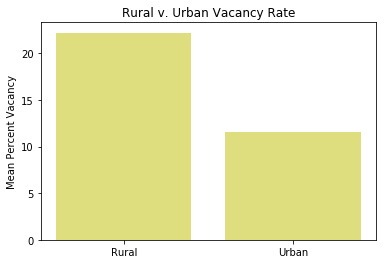

In [159]:
####Bar Chart by Vacancy####

# set variable to hold the mean of vacancy rate by urban/rural
vacant = census_pd_vacant.groupby(["label"]).mean()["Vacancy Rate"]

# set x_axis
x_axis = ["Rural", "Urban"]

# print to make sure x_axis represent the correct value from the dataframe
print(vacant)

# create bar plot with lable and title
plt.bar(x_axis, vacant, color='y', alpha=0.5, align="center")
plt.ylabel("Mean Percent Vacancy")
plt.title("Rural v. Urban Vacancy Rate")

In [109]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_vacant.groupby(["label"]).get_group("Urban")
rural = census_pd_vacant.groupby(["label"]).get_group("Rural")

# run t-test to determine significance 
(t_stat, p) = ttest_ind(urban["Vacancy Rate"], rural["Vacancy Rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

# if statement
if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")    

-68.03869497877493
0.0
The differences between the urban and rural are significant.
<class 'numpy.float64'>


label
Rural     4.921755
Urban    11.710298
Name: black rate, dtype: float64


Text(0.5,1,'Rural v. Urban African American Rate')

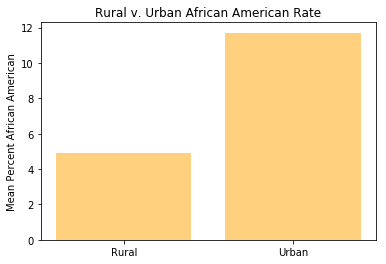

In [161]:
### create bar graph based on african american rate

# set variable to hold the mean of black rate by urban/rural
black = census_pd_race.groupby(["label"]).mean()["black rate"]

# set x-axis
x_axis = ["Rural", "Urban"]

# check that black is correct
print(black)

# create bar graph
plt.bar(x_axis, black, color='orange', alpha=0.5, align="center")
plt.ylabel("Mean Percent African American")
plt.title("Rural v. Urban African American Rate")

In [111]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_race.groupby(["label"]).get_group("Urban")
rural = census_pd_race.groupby(["label"]).get_group("Rural")

# t test to deterimine if black rate by urban/rural is significant
(t_stat, p) = ttest_ind(urban["black rate"], rural["black rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

36.77421535926393
9.554949297094021e-288
The differences between the urban and rural are significant.
<class 'numpy.float64'>


label
Rural    88.951074
Urban    76.190671
Name: white rate, dtype: float64


Text(0.5,1,'Rural v. Urban White Rate')

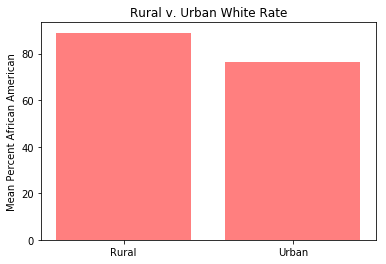

In [179]:
### bar chart 

# set variable to hold the mean of white rate by urban/rural
white = census_pd_race.groupby(["label"]).mean()["white rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(white)

# create bar chart
plt.bar(x_axis, white, color='r', alpha=0.5, align="center")
plt.ylabel("Mean Percent African American")
plt.title("Rural v. Urban White Rate")

In [113]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_race.groupby(["label"]).get_group("Urban")
rural = census_pd_race.groupby(["label"]).get_group("Rural")

# create t-test to determine if relationship is significant
(t_stat, p) = ttest_ind(urban["white rate"], rural["white rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

-55.76633695885791
0.0
The differences between the urban and rural are significant.
<class 'numpy.float64'>


label
Rural    16.899750
Urban    13.046824
Name: Disability Rate, dtype: float64


Text(0.5,1,'Rural v. Urban Disability Rate')

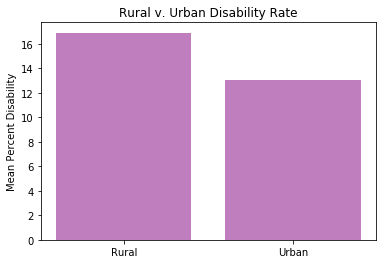

In [162]:
# set variable to hold the mean of disability rate by urban/rural
disable = census_pd_disable.groupby(["label"]).mean()["Disability Rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(disable)

# create bar chart
plt.bar(x_axis, disable, color='purple', alpha=0.5, align="center")
plt.ylabel("Mean Percent Disability")
plt.title("Rural v. Urban Disability Rate")

In [115]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_disable.groupby(["label"]).get_group("Urban")
rural = census_pd_disable.groupby(["label"]).get_group("Rural")

# create t test to determine significance 
(t_stat, p) = ttest_ind(urban["Disability Rate"], rural["Disability Rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

-43.86207363344522
0.0
The differences between the urban and rural are significant.
<class 'numpy.float64'>


label
Rural    11.766129
Urban    10.649247
Name: No Health Insurance Rate, dtype: float64


Text(0.5,1,'Rural v. Urban No Health Insurance Rate')

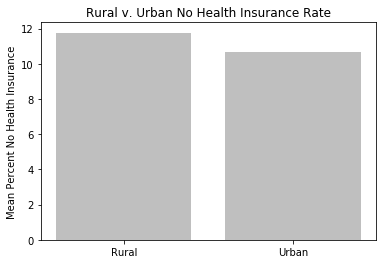

In [163]:
# set variable to hold the mean of health insurance rate by urban/rural
health = census_pd_disable.groupby(["label"]).mean()["No Health Insurance Rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(health)

# create bar chart
plt.bar(x_axis, health, color='gray', alpha=0.5, align="center")
plt.ylabel("Mean Percent No Health Insurance")
plt.title("Rural v. Urban No Health Insurance Rate")

In [117]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_disable.groupby(["label"]).get_group("Urban")
rural = census_pd_disable.groupby(["label"]).get_group("Rural")

# create t-test
(t_stat, p) = ttest_ind(urban["No Health Insurance Rate"], rural["Disability Rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

-68.0125016035763
0.0
The differences between the urban and rural are significant.
<class 'numpy.float64'>


label
Rural    7.155050
Urban    7.693533
Name: Unemployment Rate, dtype: float64


(0, 10)

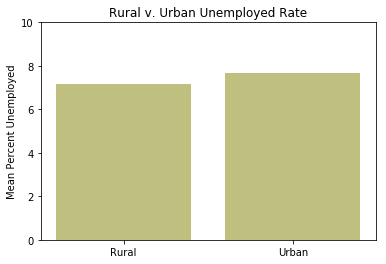

In [168]:
# set variable to hold the mean of unemployment rate by urban/rural
unemploy = census_pd_unemploy.groupby(["label"]).mean()["Unemployment Rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(unemploy)

# create bar chart
plt.bar(x_axis, unemploy, color='olive', alpha=0.5, align="center")
plt.ylabel("Mean Percent Unemployed")
plt.title("Rural v. Urban Unemployed Rate")
plt.ylim(0,10)

In [119]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_unemploy.groupby(["label"]).get_group("Urban")
rural = census_pd_unemploy.groupby(["label"]).get_group("Rural")

# create t-test
(t_stat, p) = ttest_ind(urban["Unemployment Rate"], rural["Unemployment Rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

7.437165179021994
1.0540284635412631e-13
The differences between the urban and rural are significant.
<class 'numpy.float64'>


label
Rural    15.058263
Urban    15.341282
Name: Poverty Rate, dtype: float64


(0, 16)

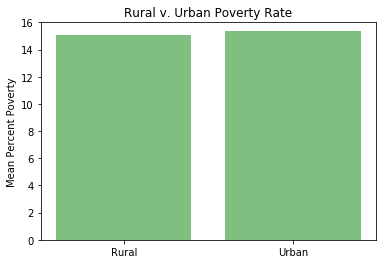

In [169]:
##Bar chart for poverty
# set variable to hold the mean of poverty rate by urban/rural
poverty = census_pd_poverty.groupby(["label"]).mean()["Poverty Rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(poverty)

# create bar chart
plt.bar(x_axis, poverty, color='g', alpha=0.5, align="center")
plt.ylabel("Mean Percent Poverty")
plt.title("Rural v. Urban Poverty Rate")
plt.ylim(0,16)

In [121]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_poverty.groupby(["label"]).get_group("Urban")
rural = census_pd_poverty.groupby(["label"]).get_group("Rural")

# run t test
(t_stat, p) = ttest_ind(urban["Poverty Rate"], rural["Poverty Rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

2.1057301801208483
0.03523649454671099
The differences between the urban and rural are significant.


label
Rural    2.279046
Urban    2.717072
Name: Cash Public Assistance Rate, dtype: float64


Text(0.5,1,'Rural v. Urban Cash Assistance')

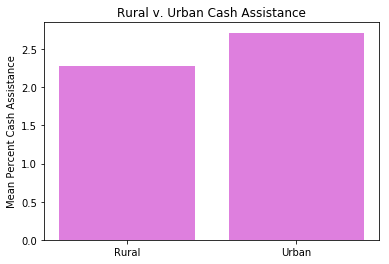

In [170]:
# bar chart for cash public assistance
# set variable to hold the mean of cash public assistance rate by urban/rural
cash = census_pd_income.groupby(["label"]).mean()["Cash Public Assistance Rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(cash)

# set bar chart
plt.bar(x_axis, cash, color='m', alpha=0.5, align="center")
plt.ylabel("Mean Percent Cash Assistance")
plt.title("Rural v. Urban Cash Assistance")

In [123]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_income.groupby(["label"]).get_group("Urban")
rural = census_pd_income.groupby(["label"]).get_group("Rural")

# create t test
(t_stat, p) = ttest_ind(urban["Cash Public Assistance Rate"], rural["Cash Public Assistance Rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")   

11.237632490809611
3.033577767695315e-29
The differences between the urban and rural are significant.
<class 'numpy.float64'>


label
Rural    7.271844
Urban    7.199502
Name: Less than 10k rate, dtype: float64


Text(0.5,1,'Rural v. Urban 10K or Less')

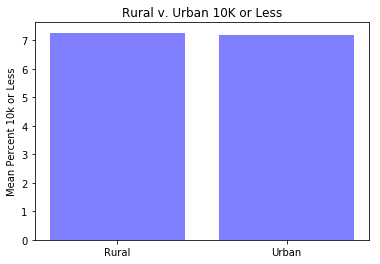

In [124]:
# bar chart for less than 10k rate
# set variable to hold the mean of less than 10k rate by urban/rural
cash = census_pd_income.groupby(["label"]).mean()["Less than 10k rate"]

x_axis = ["Rural", "Urban"]

print(cash)

plt.bar(x_axis, cash, color='b', alpha=0.5, align="center")
plt.ylabel("Mean Percent 10k or Less")
plt.title("Rural v. Urban 10K or Less")

In [125]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_income.groupby(["label"]).get_group("Urban")
rural = census_pd_income.groupby(["label"]).get_group("Rural")

# create t test to see if significant
(t_stat, p) = ttest_ind(urban["Less than 10k rate"], rural["Less than 10k rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

-0.909163687282189
0.36327082327538596
The differences between urban and rural are due to chance.


label
Rural    2.575530
Urban    6.023689
Name: over 200k rate, dtype: float64


Text(0.5,1,'Rural v. Urban 200k or more')

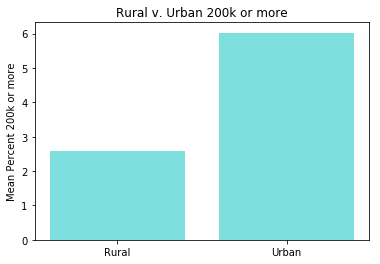

In [171]:
# bar chart for over 200k
# set variable to hold the mean of over 200k rate by urban/rural
cash = census_pd_income.groupby(["label"]).mean()["over 200k rate"]

# x = axis
x_axis = ["Rural", "Urban"]
print(cash)

# create bar chart
plt.bar(x_axis, cash, color='c', alpha=0.5, align="center")
plt.ylabel("Mean Percent 200k or more")
plt.title("Rural v. Urban 200k or more")

In [127]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_income.groupby(["label"]).get_group("Urban")
rural = census_pd_income.groupby(["label"]).get_group("Rural")

# t test for significance
(t_stat, p) = ttest_ind(urban["over 200k rate"], rural["over 200k rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

43.50137082321496
0.0
The differences between the urban and rural are significant.
<class 'numpy.float64'>


label
Rural    26.790476
Urban    22.801210
Name: 25k to 50k rate, dtype: float64


Text(0.5,1,'Rural v. Urban 25k to 50k')

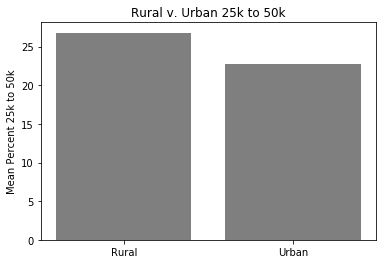

In [172]:
# bar chart for 2k5 to 50k
# set variable to hold the mean of 20k to 50k rate by urban/rural
cash = census_pd_income.groupby(["label"]).mean()["25k to 50k rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(cash)

# create bar
plt.bar(x_axis, cash, color='black', alpha=0.5, align="center")
plt.ylabel("Mean Percent 25k to 50k")
plt.title("Rural v. Urban 25k to 50k")

In [129]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_income.groupby(["label"]).get_group("Urban")
rural = census_pd_income.groupby(["label"]).get_group("Rural")

# t-test
(t_stat, p) = ttest_ind(urban["25k to 50k rate"], rural["25k to 50k rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

-35.98984746623201
3.6819444180937356e-278
The differences between the urban and rural are significant.


label
Rural    0.894011
Urban    1.271250
Name: No schooling rate, dtype: float64


Text(0.5,1,'Rural v. Urban No School')

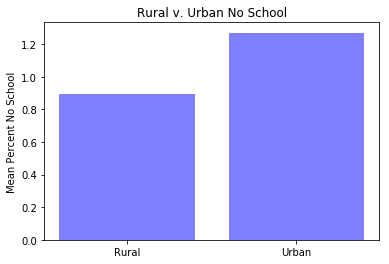

In [130]:
# bar chart for no school
# set variable to hold the mean of no school rate by urban/rural
nosch = census_pd_educ.groupby(["label"]).mean()["No schooling rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(nosch)

# create bar chart
plt.bar(x_axis, nosch, color='b', alpha=0.5, align="center")
plt.ylabel("Mean Percent No School")
plt.title("Rural v. Urban No School")

In [131]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_educ.groupby(["label"]).get_group("Urban")
rural = census_pd_educ.groupby(["label"]).get_group("Rural")

# run t test 
(t_stat, p) = ttest_ind(urban["No schooling rate"], rural["No schooling rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

17.8875749216598
3.2405178404832572e-71
The differences between the urban and rural are significant.


label
Rural    18.058370
Urban    30.761606
Name: bachelor or higher rate, dtype: float64


Text(0.5,1,'Rural v. Urban Bachelor or More')

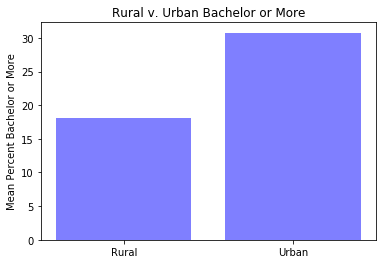

In [132]:
# bar chart for bachelor or higher degree
# set variable to hold the mean of bacholer or higher rate by urban/rural
bach = census_pd_educ.groupby(["label"]).mean()["bachelor or higher rate"]

x_axis = ["Rural", "Urban"]

print(bach)

plt.bar(x_axis, bach, color='b', alpha=0.5, align="center")
plt.ylabel("Mean Percent Bachelor or More")
plt.title("Rural v. Urban Bachelor or More")

In [133]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_educ.groupby(["label"]).get_group("Urban")
rural = census_pd_educ.groupby(["label"]).get_group("Rural")

# set t-test
(t_stat, p) = ttest_ind(urban["bachelor or higher rate"], rural["bachelor or higher rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

69.34932839435545
0.0
The differences between the urban and rural are significant.


label
Rural    37.941760
Urban    27.706044
Name: high school grad rate, dtype: float64


Text(0.5,1,'Rural v. Urban High School grads only')

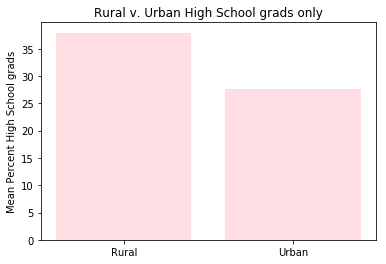

In [180]:
# bar chart for high school grad rate
# set variable to hold the mean of high school grad rate by urban/rural
hs = census_pd_educ.groupby(["label"]).mean()["high school grad rate"]

# create x axis
x_axis = ["Rural", "Urban"]
print(hs)

# create bar chart
plt.bar(x_axis, hs, color='pink', alpha=0.5, align="center")
plt.ylabel("Mean Percent High School grads")
plt.title("Rural v. Urban High School grads only")

label
Rural    86.192577
Urban    87.722829
Name: high school grad and up rate, dtype: float64


Text(0.5,1,'Rural v. Urban High School or More')

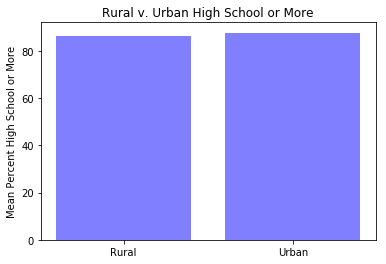

In [183]:
# bar chart for high school and up
hs = census_pd_educ.groupby(["label"]).mean()["high school grad and up rate"]

# set x axis
x_axis = ["Rural", "Urban"]
print(hs)

# create bar chart
plt.bar(x_axis, hs, color='b', alpha=0.5, align="center")
plt.ylabel("Mean Percent High School or More")
plt.title("Rural v. Urban High School or More")

In [182]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_educ.groupby(["label"]).get_group("Urban")
rural = census_pd_educ.groupby(["label"]).get_group("Rural")

# run t test 
(t_stat, p) = ttest_ind(urban["high school grad and up rate"], rural["high school grad and up rate"], equal_var=False)
print(t_stat)
print(np.float64(p).astype(str))

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")

13.437854373136037
4.774852108289541e-41
The differences between the urban and rural are significant.


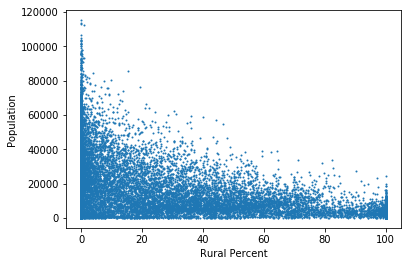

In [134]:
# create a scatter plot that works and looks pretty
plt.scatter(census_pd_race["Rural Percent"], census_pd["Population"], marker='o', s=1)
plt.xlabel("Rural Percent")
plt.ylabel("Population")
plt.show()

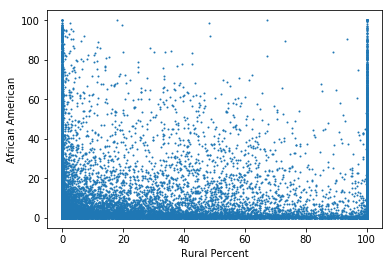

In [178]:
# create disgusting scatter plot to show why the way we set-up and analyzed data didn't work out
plt.scatter(census_pd_race["Rural Percent"], census_pd_race["black rate"], marker='o', s=1)
plt.xlabel("Rural Percent")
plt.ylabel("African American")
plt.show()

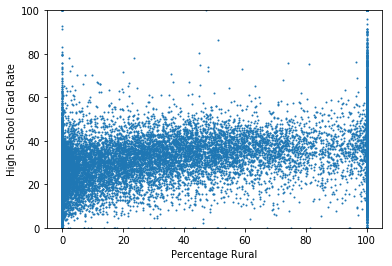

In [139]:
# another scatter example if needed
plt.scatter(census_pd_educ["Rural Percent"], census_pd_educ["high school grad rate"], marker='o', s=1)
plt.xlabel("Percentage Rural")
plt.ylabel("High School Grad Rate")
plt.ylim(0,100)

plt.show()


In [140]:
############################## HEATMAPS #############################################
####################################### gkey = ######################################

# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [141]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_pd_educ[["LAT", "LNG"]].astype(float)

# Convert no schooling rate to float and store
noschool_rate = census_pd_educ["No schooling rate"].astype(float)

In [142]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=(noschool_rate))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 400
heat_layer.point_radius = .75
heat_layer.opacity = .5
#heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig

##########################  Heat Map for No Schooling Rate #############################################
# analysis: overall urban areas are significantly higher in no schooling rate
# low schooling rate in allpalchia/coal country

Figure(layout=FigureLayout(height='420px'))

In [34]:
## heatmap with sample
# Store 'Lat' and 'Lng' into  locations 
locations = census_pd_educ[["LAT", "LNG"]].astype(float)
l_samps = locations.sample(5000, replace=True)

# Convert no schooling rate to float and store
noschool_rate = census_pd_educ["No schooling rate"].astype(float)
no_samps = noschool_rate.sample(5000, replace=True)

In [35]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(l_samps, weights=(no_samps))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1
heat_layer.opacity = .5
#heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig

############# No School Sample of 5000 ##################################

Figure(layout=FigureLayout(height='420px'))

In [36]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_pd[["LAT", "LNG"]].astype(float)

# Convert Rural Rate to float and store
rural_rate = census_pd["Rural Percent"].astype(float)

In [37]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=(rural_rate))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 800
heat_layer.point_radius =.25
heat_layer.opacity = .5
#heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig

############### Heat Map based off of rural percentage #################
# analysis: shows where we would see no data at all

Figure(layout=FigureLayout(height='420px'))

In [92]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_pd_race[["LAT", "LNG"]].astype(float)

# Convert african american Rate to float and store
black_rate = census_pd_race["black rate"].astype(float)

In [94]:
# Create a african american Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=(black_rate))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 300
heat_layer.point_radius = .5
heat_layer.opacity = .5
#heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [55]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_pd_vacant[["LAT", "LNG"]].astype(float)

# Convert vacant Rate to float and store
vacant_rate = census_pd_vacant["Vacancy Rate"].astype(float)

In [56]:
# Create a vacant Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=(vacant_rate))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 5000
heat_layer.point_radius = 1
heat_layer.opacity = .5
#heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig

######################### Vacancy Rate Heat Map #########################

Figure(layout=FigureLayout(height='420px'))

In [176]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_pd_race[["LAT", "LNG"]].astype(float)

# Convert white Rate to float and store
white_rate = census_pd_race["white rate"].astype(float)

In [144]:
# Create a white Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=(white_rate))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 4000
heat_layer.point_radius = .75
heat_layer.opacity = .5
#heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [177]:
# Create a white Heatmap layer for Jisan
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=(white_rate))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 4000
heat_layer.point_radius = .75
heat_layer.opacity = .5
heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [145]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_pd_educ[["LAT", "LNG"]].astype(float)

# Convert bachelor or higher rate to store
bach_rate = census_pd_educ["bachelor or higher rate"].astype(float)

In [148]:
# Create a bach or higher Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=(bach_rate))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 750
heat_layer.point_radius = .5
heat_layer.opacity = .5
#heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig
############### Bachelor or More Education ##########################

Figure(layout=FigureLayout(height='420px'))

In [149]:
# Store 'Lat' and 'Lng' into  locations 
locations = census_pd_educ[["LAT", "LNG"]].astype(float)

# Convert high school grad Rate to float and store
hs_rate = census_pd_educ["high school grad rate"].astype(float)

In [155]:
# Create a high school grad rate Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=(hs_rate))

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 2000
heat_layer.point_radius = .75
heat_layer.opacity = .5
#heat_layer.gradient = ["blue", "red"]

fig.add_layer(heat_layer)

fig
############### HIgh School Education ##########################

Figure(layout=FigureLayout(height='420px'))